In [1]:
import FinanceDataReader as fdr
df = fdr.DataReader('138040', '2003')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2011-05-13,6161,6161,5241,5242,428994,NaN
2011-05-16,4464,4464,4464,4465,487412,-0.148226
2011-05-17,3938,4056,3796,3796,12268654,-0.149832
2011-05-18,3881,3895,3706,3730,6188170,-0.017387
2011-05-19,3739,3763,3194,3280,6181312,-0.120643


<Axes: xlabel='Date'>

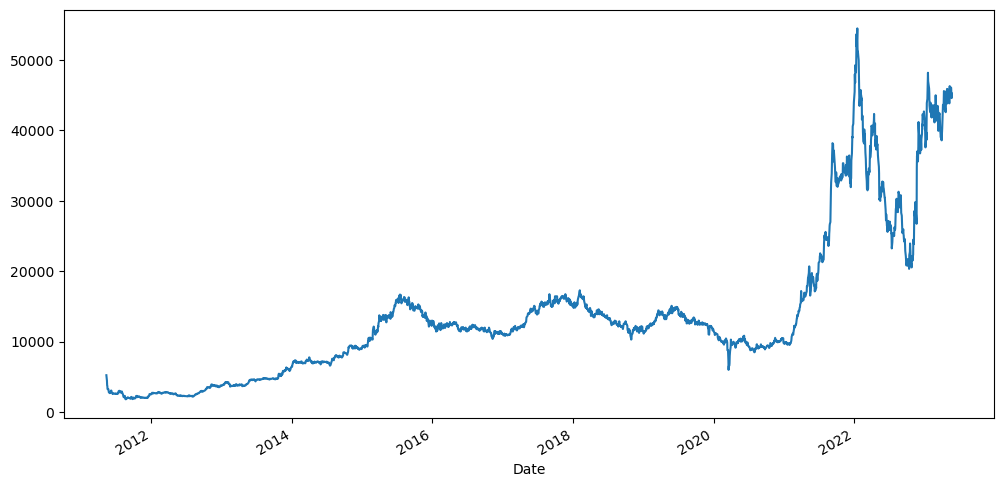

In [2]:
df['Close'].plot(figsize = (12,6))

In [3]:
df['cum_ror'] = (1 + df['Change']).cumprod() - 1
df.head()

,Open,High,Low,Close,Volume,Change,cum_ror
Date,,,,,,,
2011-05-13,6161,6161,5241,5242,428994,NaN,NaN
2011-05-16,4464,4464,4464,4465,487412,-0.148226,-0.148226
2011-05-17,3938,4056,3796,3796,12268654,-0.149832,-0.275849
2011-05-18,3881,3895,3706,3730,6188170,-0.017387,-0.288440
2011-05-19,3739,3763,3194,3280,6181312,-0.120643,-0.374285


# 성과분석
- 연평균 복리 수익률(CAGR)
- 최대 낙폭(MDD)
- 변동성 (Valaility)
- 샤프 지수(Sharpe ratio)

### 01. 연평균 복리 수익률

In [4]:
# AIR : Accumulative Investment rate
# inv_year : Investment year(투자년도)
# (1 + AIR)**(1/inv_year) - 1
# CAGR = (1 + AIR)**(1/inv_year) - 1

AIR = df['cum_ror'].iloc[-1]
start_date = df.index[0]
end_date = df.index[-1]
inv_year = (end_date - start_date).days / 365
CAGR = (1 + AIR)**(1/inv_year) - 1
CAGR

0.19613246728330958

### MDD

<Axes: xlabel='Date'>

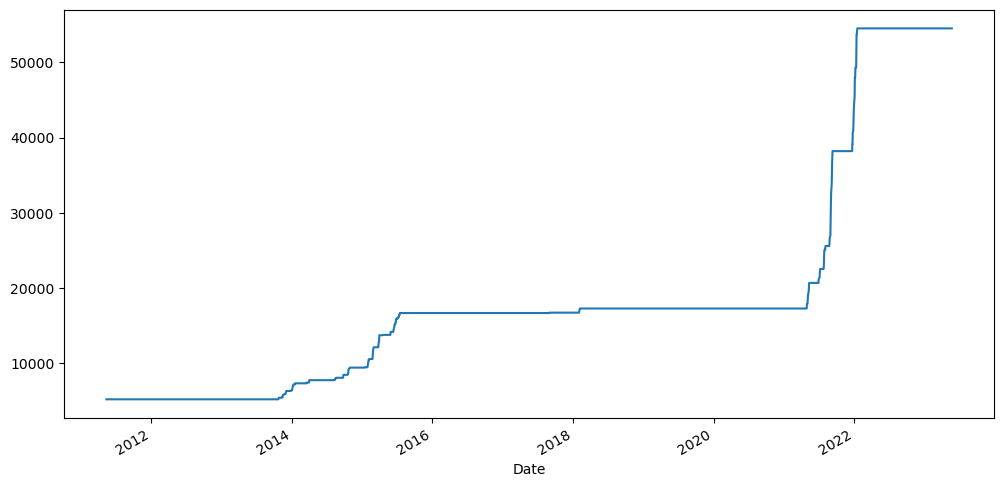

In [5]:
df['cum_max'] = df['Close'].cummax()
df['cum_max'].plot(figsize = (12,6))

In [6]:
df['최대값에서하락률'] = (df['Close'] / df['cum_max']) - 1
df.head()

,Open,High,Low,Close,Volume,Change,cum_ror,cum_max,최대값에서하락률
Date,,,,,,,,,
2011-05-13,6161,6161,5241,5242,428994,NaN,NaN,5242,0.000000
2011-05-16,4464,4464,4464,4465,487412,-0.148226,-0.148226,5242,-0.148226
2011-05-17,3938,4056,3796,3796,12268654,-0.149832,-0.275849,5242,-0.275849
2011-05-18,3881,3895,3706,3730,6188170,-0.017387,-0.288440,5242,-0.288440
2011-05-19,3739,3763,3194,3280,6181312,-0.120643,-0.374285,5242,-0.374285


<Axes: xlabel='Date'>

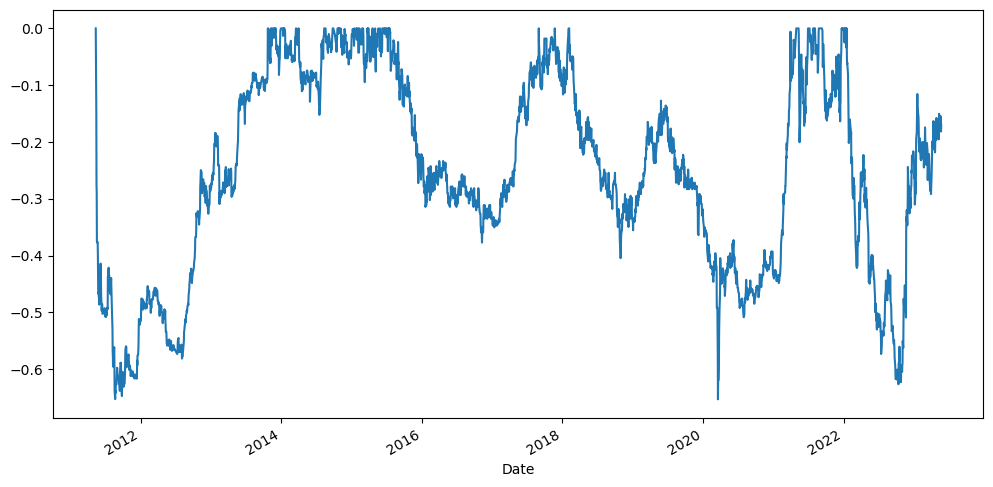

In [7]:
df['최대값에서하락률'].plot(figsize = (12,6))

<Axes: xlabel='Date'>

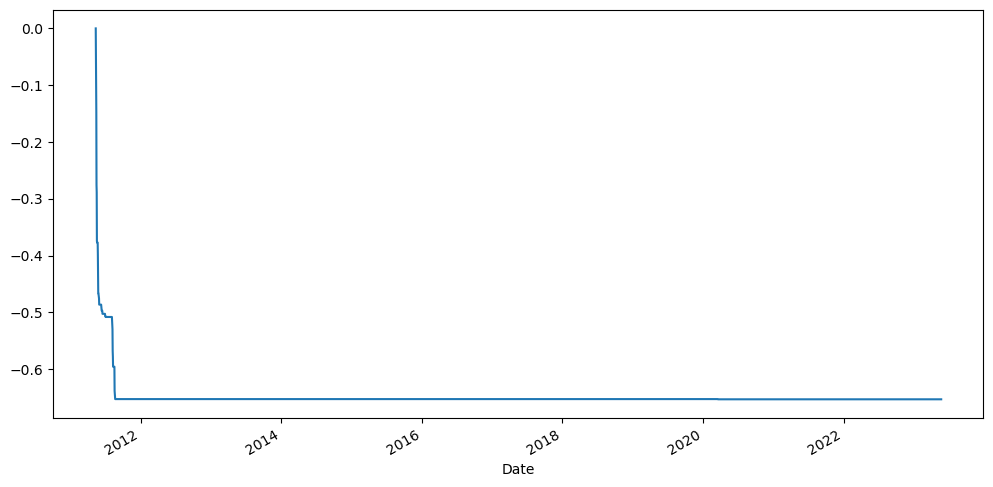

In [8]:
df['MDD'] = df['최대값에서하락률'].cummin()
df['MDD'].plot(figsize = (12,6))

In [9]:
MDD = df['MDD'].iloc[-1]
MDD

-0.653179190751445

### 변동성

In [10]:
std = df['Change'].std()
std

0.0229875236789746

In [11]:
import numpy as np
VOL = std * np.sqrt(252)
VOL

0.36491562547065226

### 샤프 지수
“샤프비율(Sharp Ratio) = (포트폴리오 기대수익률 – 무위험이자률) / 변동성(리스크)”
- 샤프 비율이 높을 수록 더 적은 위험으로 더 높은 수익률을 낼 수 있다.
- 샤프비율이 0이상이여야 투자대상, 1이상 경우 괜찮은 투자



In [12]:
# Sharp Ratio = (포트폴리오 기대수익률 – 무위험이자률) / 변동성(리스크)

In [16]:
rfr = 0.035

In [17]:
# rfr : risk free rate
Sharp_Ratio = (CAGR - rfr) / VOL
Sharp_Ratio

0.44156088705570756

In [15]:
print(f'연복리수익률 : {round(CAGR * 100, 2)}%')
print(f'샤프지수 : {round(Sharp_Ratio, 2)}')
print(f'변동성 : {round(VOL * 100, 2)}%')
print(f'최대하락률 : {round(abs(MDD) * 100, 2)}%')

연복리수익률 : 19.61%
샤프지수 : 0.44
변동성 : 36.49%
최대하락률 : 65.32%
